In [1]:
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
names = pd.read_csv("data/us-baby-names/NationalNames.csv", sep=",",
                     header=0, names=["id", "name", "year", "sex", "births"])

In [3]:
names.head()

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [4]:
names.shape

(1825433, 5)

In [10]:
total_births = names.pivot_table("births", index="year",columns="sex",aggfunc=sum)
#각 (연도, 성별) 그룹의 총 출생횟수 산출하기

In [6]:
total_births.tail()

sex,F,M
year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


<IPython.core.display.Javascript object>


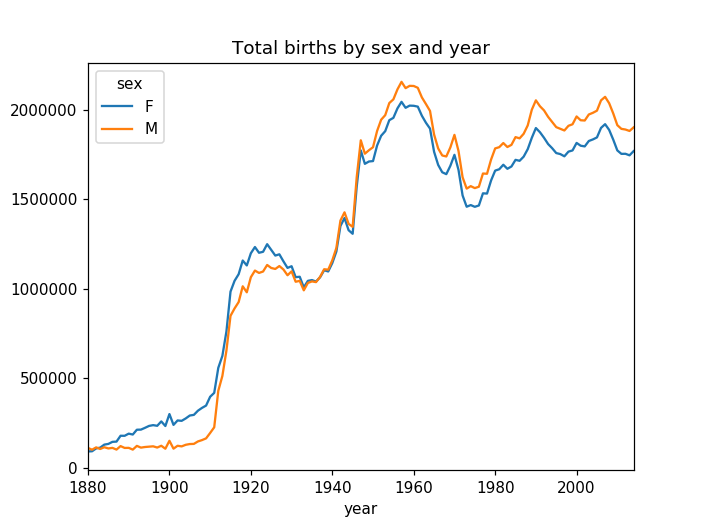

In [8]:
ax = total_births.plot()

In [9]:
ax.set_title("Total births by sex and year")

In [26]:
grouped_names_dict = dict(list(names.groupby(["year", "sex"])))
#각 (연도, 성별) 그룹 내에서 각 이름의 출생횟수가 전체에서 차지하는 비중(%)을 나타내는 열 추가하기

In [29]:
grouped_names_dict

{(1880, 'F'):       id       name  year sex  births
 0      1       Mary  1880   F    7065
 1      2       Anna  1880   F    2604
 2      3       Emma  1880   F    2003
 3      4  Elizabeth  1880   F    1939
 4      5     Minnie  1880   F    1746
 5      6   Margaret  1880   F    1578
 6      7        Ida  1880   F    1472
 7      8      Alice  1880   F    1414
 8      9     Bertha  1880   F    1320
 9     10      Sarah  1880   F    1288
 10    11      Annie  1880   F    1258
 11    12      Clara  1880   F    1226
 12    13       Ella  1880   F    1156
 13    14   Florence  1880   F    1063
 14    15       Cora  1880   F    1045
 15    16     Martha  1880   F    1040
 16    17      Laura  1880   F    1012
 17    18     Nellie  1880   F     995
 18    19      Grace  1880   F     982
 19    20     Carrie  1880   F     949
 20    21      Maude  1880   F     858
 21    22      Mabel  1880   F     808
 22    23     Bessie  1880   F     796
 23    24     Jennie  1880   F     793
 24    25   

In [30]:
grouped_sample = grouped_names_dict[(2011, 'M')]

In [31]:
grouped_sample.shape

(14329, 5)

In [13]:
grouped_sample.head(10)

,id,name,year,sex,births
1711173,1711174,Jacob,2011,M,20331
1711174,1711175,Mason,2011,M,19488
1711175,1711176,William,2011,M,17314
1711176,1711177,Jayden,2011,M,16954
1711177,1711178,Noah,2011,M,16838
1711178,1711179,Michael,2011,M,16744
1711179,1711180,Ethan,2011,M,16665
1711180,1711181,Alexander,2011,M,15681
1711181,1711182,Aiden,2011,M,15469
1711182,1711183,Daniel,2011,M,15249


In [14]:
def add_prop(agg_df):
    agg_births = agg_df["births"]
    agg_df["prop"] = agg_births / agg_births.sum()
    return agg_df

In [15]:
names_with_prop = names.groupby(["year", "sex"]).apply(add_prop)

In [16]:
names_with_prop.head()

,id,name,year,sex,births,prop
0,1,Mary,1880,F,7065,0.077643
1,2,Anna,1880,F,2604,0.028618
2,3,Emma,1880,F,2003,0.022013
3,4,Elizabeth,1880,F,1939,0.021309
4,5,Minnie,1880,F,1746,0.019188


In [17]:
grouped_names_with_prop_dict = dict(list(names_with_prop.groupby(["year", "sex"])))

#각 (연도, 성별) 그룹 내 출생횟수 기준 TOP 1000 이름 추출하기

In [18]:
grouped_sample = grouped_names_with_prop_dict[(2011, 'M')]

In [19]:
grouped_sample.head(10)

,id,name,year,sex,births,prop
1711173,1711174,Jacob,2011,M,20331,0.010739
1711174,1711175,Mason,2011,M,19488,0.010294
1711175,1711176,William,2011,M,17314,0.009145
1711176,1711177,Jayden,2011,M,16954,0.008955
1711177,1711178,Noah,2011,M,16838,0.008894
1711178,1711179,Michael,2011,M,16744,0.008844
1711179,1711180,Ethan,2011,M,16665,0.008802
1711180,1711181,Alexander,2011,M,15681,0.008283
1711181,1711182,Aiden,2011,M,15469,0.008171
1711182,1711183,Daniel,2011,M,15249,0.008054


In [20]:
grouped_sample.sort_values(by="births", ascending=False).iloc[:10]

,id,name,year,sex,births,prop
1711173,1711174,Jacob,2011,M,20331,0.010739
1711174,1711175,Mason,2011,M,19488,0.010294
1711175,1711176,William,2011,M,17314,0.009145
1711176,1711177,Jayden,2011,M,16954,0.008955
1711177,1711178,Noah,2011,M,16838,0.008894
1711178,1711179,Michael,2011,M,16744,0.008844
1711179,1711180,Ethan,2011,M,16665,0.008802
1711180,1711181,Alexander,2011,M,15681,0.008283
1711181,1711182,Aiden,2011,M,15469,0.008171
1711182,1711183,Daniel,2011,M,15249,0.008054


In [32]:
def get_top1000(agg_df):
    top1000_df = agg_df.sort_values(by="births", ascending=False).iloc[:1000]
    return top1000_df

In [35]:
get_top1000

<function __main__.get_top1000>

In [22]:
top1000_names = names_with_prop.groupby(["year", "sex"]).apply(get_top1000)

In [23]:
top1000_names.head()

id       name  year sex  births      prop
year sex                                             
1880 F   0   1       Mary  1880   F    7065  0.077643
         1   2       Anna  1880   F    2604  0.028618
         2   3       Emma  1880   F    2003  0.022013
         3   4  Elizabeth  1880   F    1939  0.021309
         4   5     Minnie  1880   F    1746  0.019188

In [24]:
names_with_prop.loc[(names_with_prop["year"] == 2011) & \
                    (names_with_prop["sex"] == "M")].shape

(14329, 6)

In [36]:
top1000_names.loc[(2011, "M")].shape

(1000, 6)

In [37]:
top1000_names.head()

id       name  year sex  births      prop
year sex                                             
1880 F   0   1       Mary  1880   F    7065  0.077643
         1   2       Anna  1880   F    2604  0.028618
         2   3       Emma  1880   F    2003  0.022013
         3   4  Elizabeth  1880   F    1939  0.021309
         4   5     Minnie  1880   F    1746  0.019188

In [39]:
top1000_props = top1000_names.pivot_table("prop", index="year", \
                                          columns="sex", aggfunc=sum)
#각 연도에 따른 전체 출생횟수 대비 TOP 1000 이름들의 출생횟수 비중 산출하기

In [40]:
top1000_props.head()


sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


<IPython.core.display.Javascript object>


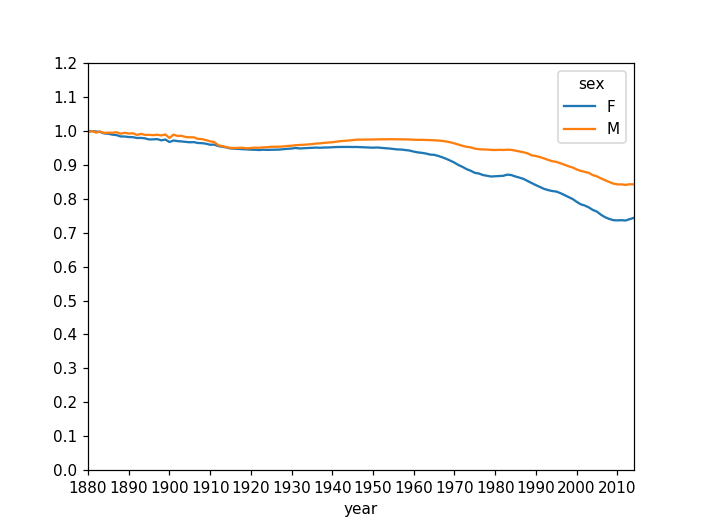

In [41]:
ax = top1000_props.plot()

In [43]:
ax.set_xticks(range(1880, 2020, 10))
ax.set_yticks(np.arange(0, 1.3, 0.1))

In [44]:
top1000_names.head()

id       name  year sex  births      prop
year sex                                             
1880 F   0   1       Mary  1880   F    7065  0.077643
         1   2       Anna  1880   F    2604  0.028618
         2   3       Emma  1880   F    2003  0.022013
         3   4  Elizabeth  1880   F    1939  0.021309
         4   5     Minnie  1880   F    1746  0.019188

In [45]:
top_names_births = top1000_names.pivot_table("births", index="year", columns="name", aggfunc=sum)
#특정 이름들의 연도에 따른 출생횟수 변화 추이 분석하기

In [46]:
top_names_births.head()

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [47]:
top_names_births_subset = top_names_births[["John", "Harry", "Mary", "Marilyn"]]

In [48]:
top_names_births_subset.head()

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8178.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9428.0,2338.0,9253.0,NaN


<IPython.core.display.Javascript object>


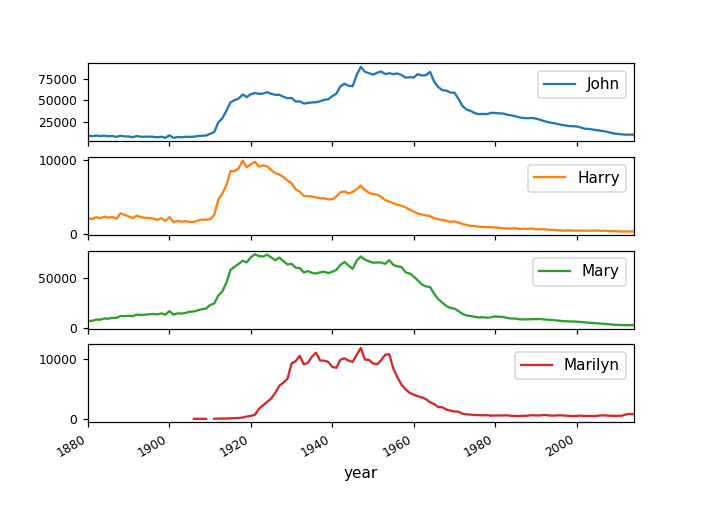

In [49]:
ax = top_names_births_subset.plot(subplots=True, fontsize=8)
#subplots를 사용하면 각 그래프가 그려진다

In [50]:
get_last_letter = lambda x: x[-1]
#이름의 마지막 글자가 무엇인지 알아보는 코딩
#남아 이름의 마지막 글자가 연도에 따라 어떻게 변화하였는지 분석하기

In [52]:
names["last_letters"] = names["name"].apply(get_last_letter)

In [53]:
names.head()

,id,name,year,sex,births,last_letters
0,1,Mary,1880,F,7065,y
1,2,Anna,1880,F,2604,a
2,3,Emma,1880,F,2003,a
3,4,Elizabeth,1880,F,1939,h
4,5,Minnie,1880,F,1746,e


In [54]:
last_letters_table = names.pivot_table("births", index="last_letters",columns=["sex", "year"], aggfunc=sum)

In [55]:
last_letters_table.head()

sex                 F                                                        \
year             1880     1881     1882     1883     1884     1885     1886   
last_letters                                                                  
a             31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                 NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d               609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e             33380.0  34080.0  40399.0  41913.0  48089.0  49616.0  53884.0   

sex                                        ...            M            \
year             1887     1888     1889    ...         2005      2006   
last_letters                               ...                          
a             48942.0  59441.0  58632.0    ...      36877.0   36210.0   
b                 NaN      NaN      NaN    ...      43178.0   42645.0   
c                 NaN      NaN      NaN    ...      26102.0   26661.0   
d              1027.0   1298.0   1374.0    ...      50730.0   51474.0   
e             54353.0  66750.0  66661.0    ...     141237.0  143126.0   

sex                                                                       \
year              2007      2008      2009      2010      2011      2012   
last_letters                                                               
a              34723.0   32988.0   31573.0   28814.0   27384.0   27136.0   
b              42190.0   40047.0   39038.0   39208.0   36605.0   34626.0   
c              26893.0   25365.0   24127.0   23307.0   23085.0   24209.0   
d              50686.0   48018.0   46310.0   44758.0   43158.0   42376.0   
e             143915.0  141234.0  135857.0  130073.0  128572.0  128174.0   

sex                               
year              2013      2014  
last_letters                      
a              27299.0   27931.0  
b              33089.0   31085.0  
c              23970.0   23617.0  
d              42533.0   43641.0  
e             131725.0  131036.0  

[5 rows x 270 columns]

In [57]:
three_years_subtable = last_letters_table.reindex(columns=[1910, 1960, 2010], level="year")

In [58]:
three_years_subtable.head()

sex                  F                            M                    
year              1910      1960      2010     1910      1960      2010
last_letters                                                           
a             108397.0  691245.0  675901.0    977.0    5214.0   28814.0
b                  NaN     694.0     454.0    411.0    3912.0   39208.0
c                  5.0      49.0     953.0    482.0   15466.0   23307.0
d               6751.0    3728.0    2635.0  22113.0  262143.0   44758.0
e             133601.0  435048.0  316288.0  28665.0  178810.0  130073.0

In [59]:
three_years_letters_prop = three_years_subtable / three_years_subtable.sum()

In [61]:
three_years_letters_prop.head()

sex                  F                             M                    
year              1910      1960      2010      1910      1960      2010
last_letters                                                            
a             0.273384  0.341846  0.381275  0.005030  0.002445  0.015056
b                  NaN  0.000343  0.000256  0.002116  0.001834  0.020486
c             0.000013  0.000024  0.000538  0.002482  0.007252  0.012178
d             0.017026  0.001844  0.001486  0.113857  0.122915  0.023386
e             0.336950  0.215147  0.178418  0.147592  0.083841  0.067964

<IPython.core.display.Javascript object>


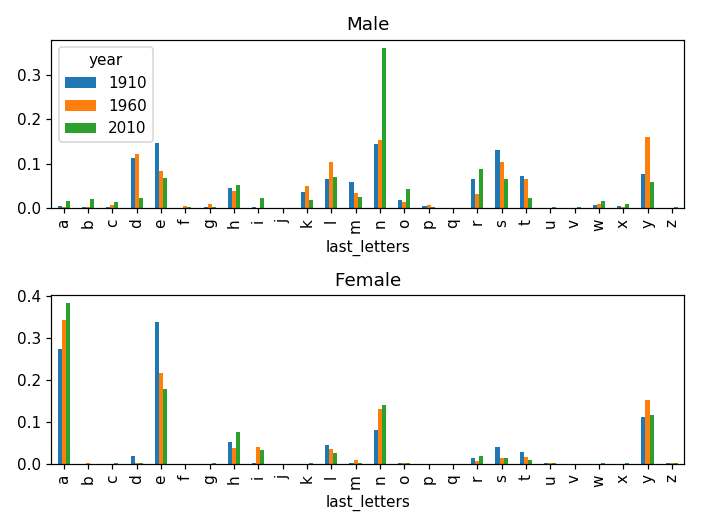

In [62]:
fig, axes = plt.subplots(2, 1)


In [63]:
three_years_letters_prop["M"].plot(kind="bar", ax=axes[0], title="Male")


In [64]:
three_years_letters_prop["F"].plot(kind="bar", ax=axes[1], title="Female", legend=False)

In [65]:
plt.tight_layout()
#그래프 보기 좋게 해줌

In [66]:
letters_prop = last_letters_table / last_letters_table.sum()


In [67]:
letters_prop.head()


sex                  F                                                    \
year              1880      1881      1882      1883      1884      1885   
last_letters                                                               
a             0.345587  0.343443  0.338767  0.341254  0.338547  0.341272   
b                  NaN       NaN       NaN       NaN       NaN       NaN   
c                  NaN       NaN  0.000046  0.000045       NaN       NaN   
d             0.006693  0.006601  0.006806  0.007211  0.007100  0.006479   
e             0.366841  0.370620  0.374585  0.373154  0.372719  0.372898   

sex                                                     ...            M  \
year              1886      1887      1888      1889    ...         2005   
last_letters                                            ...                
a             0.339710  0.335261  0.332766  0.328717    ...     0.018486   
b                  NaN       NaN       NaN       NaN    ...     0.021645   
c                  NaN       NaN       NaN       NaN    ...     0.013085   
d             0.006967  0.007035  0.007267  0.007703    ...     0.025431   
e             0.372809  0.372327  0.373684  0.373732    ...     0.070801   

sex                                                                       \
year              2006      2007      2008      2009      2010      2011   
last_letters                                                               
a             0.017643  0.016757  0.016200  0.015952  0.015056  0.014464   
b             0.020778  0.020361  0.019667  0.019723  0.020486  0.019335   
c             0.012990  0.012978  0.012456  0.012190  0.012178  0.012193   
d             0.025080  0.024461  0.023581  0.023397  0.023386  0.022796   
e             0.069737  0.069452  0.069359  0.068639  0.067964  0.067911   

sex                                         
year              2012      2013      2014  
last_letters                                
a             0.014362  0.014509  0.014690  
b             0.018326  0.017587  0.016349  
c             0.012813  0.012740  0.012421  
d             0.022428  0.022606  0.022952  
e             0.067838  0.070012  0.068916  

[5 rows x 270 columns]

In [68]:
dny_prop = letters_prop.loc[["d", "n", "y"], "M"]


In [69]:
dny_prop

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
last_letters,,,,,,,,,,,,,,,,,,,,,
d,0.083057,0.083240,0.085339,0.084059,0.086120,0.085473,0.087648,0.089071,0.087710,0.091921,...,0.025431,0.025080,0.024461,0.023581,0.023397,0.023386,0.022796,0.022428,0.022606,0.022952
n,0.153216,0.153209,0.149558,0.151650,0.149924,0.146354,0.149661,0.148845,0.151291,0.151984,...,0.344296,0.351653,0.358228,0.361046,0.362462,0.362458,0.364154,0.360269,0.354485,0.351338
y,0.075762,0.077453,0.077537,0.079146,0.080405,0.081883,0.081681,0.082868,0.084921,0.086333,...,0.062807,0.060342,0.059643,0.060346,0.057242,0.058183,0.058074,0.057568,0.056305,0.055010


<IPython.core.display.Javascript object>


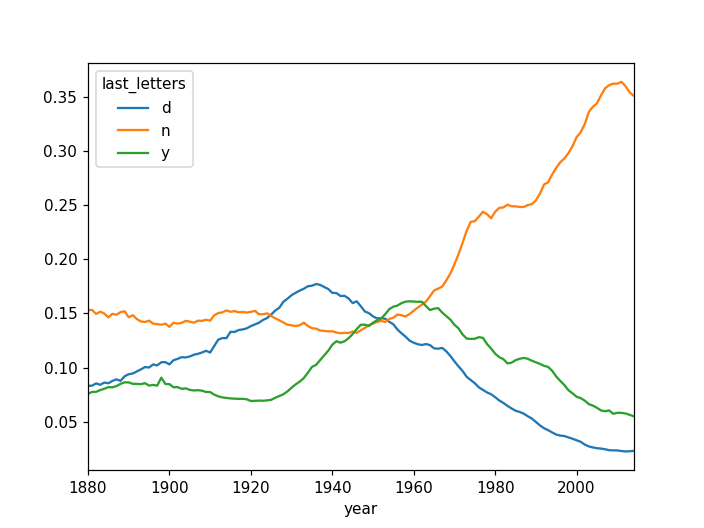

In [70]:
dny_prop.transpose().plot()